<a href="https://www.kaggle.com/code/shubhammisar/harry-potter-character-word2vec-embedding?scriptVersionId=138224863" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

In this exciting project, we explore the enchanting world of Harry Potter characters. We use special techniques called Word2Vec models and Principal Component Analysis (PCA) to understand their traits, relationships, and unique features. With colorful word clouds, 3D representations, and bar plots, we get fascinating insights into the beloved wizarding universe.

By analyzing how the characters are connected and how they interact, we discover more about their friendships, rivalries, and important roles in the magical realm. Join us on this magical journey as we unravel the mysteries and magic of the beloved Harry Potter characters, celebrating the timeless charm of this captivating story.


In [73]:
from nltk.tokenize import sent_tokenize
import numpy as np
import matplotlib.pyplot as plt
import gensim
import nltk
from wordcloud import WordCloud

## Reading Data

In [74]:
with open("Harry_Potter_all_books_preprocessed.txt") as f:
    data = f.read()

In [77]:
data[:1000]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley was the director of a firm called Grunnings which made drills .He was a big beefy man with hardly any neck although he did have a very large mustache .Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors .The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it .They didnt think they could bear it if anyone found out about the Potters .Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in 

The text is already pretty clean, there are no extra spaces or wierd characters

In [81]:
lines = sent_tokenize(data)

In [84]:
lines[0][:1000]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley was the director of a firm called Grunnings which made drills .He was a big beefy man with hardly any neck although he did have a very large mustache .Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors .The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it .They didnt think they could bear it if anyone found out about the Potters .Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in 

Tokenization isn't proper probabality beacuse of '. ' is wrong.

## Data Cleaning

In [85]:
import re

text = "THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley" 
replaced_text = re.sub(r'\s\.([A-Z])', r'. \1', text)

print(replaced_text)

THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much. They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense. Mr Dursley


Now we can apply this to entire corpus

In [86]:
corpus = re.sub(r'\s\.([A-Z])', r'. \1', data)

In [87]:
lines = sent_tokenize(corpus)

In [88]:
lines[0]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.'

Now it works fine! Let's further tokenize and clean the text using gensim

In [89]:
tokens = []
for line in lines:
    tokens.append(gensim.utils.simple_preprocess(line))

In [90]:
tokens[0]

['the',
 'boy',
 'who',
 'lived',
 'mr',
 'and',
 'mrs',
 'dursley',
 'of',
 'number',
 'four',
 'privet',
 'drive',
 'were',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 'thank',
 'you',
 'very',
 'much']

Lets see the total length of the lines we have

In [94]:
len(tokens)

63877

## Setting up and Training Word2Vec Model

In [95]:
model = gensim.models.Word2Vec(
window =  5,
min_count = 10,
sg = 1,
negative = 10
)

Build vocabulary from tokens

In [96]:
model.build_vocab(tokens)

Let's train the Word2Vec model

In [113]:
model.train(tokens, total_examples=model.corpus_count, epochs=model.epochs)

(3821897, 5268160)

## Character Analysis

In [114]:
embedding_matrix = model.wv.vectors
embedding_dimensions = embedding_matrix.shape[1]

print("Embedding Dimensions:", embedding_dimensions)

Embedding Dimensions: 100


Let's find out who's kinda like Hermione!

In [99]:
model.wv.most_similar("hermione")

[('parvati', 0.6873595714569092),
 ('luna', 0.6828758716583252),
 ('ginny', 0.6619588732719421),
 ('ron', 0.6593000292778015),
 ('cho', 0.6554461121559143),
 ('lavender', 0.6485152244567871),
 ('weakly', 0.6357407569885254),
 ('she', 0.6330693960189819),
 ('amazed', 0.6314285397529602),
 ('encouragingly', 0.630331814289093)]

Hermione's similarity to characters like Parvati, Luna, Ginny, and Ron is likely influenced by shared gender, relationships, and memorable moments together in the story.

Alright, now let's imagine an evil version of Dumbledore.

In [122]:
db_vector = model.wv['dumbledore']


good_vector = model.wv['good']

evil_vector = model.wv['dark']

result_vector = db_vector - good_vector + evil_vector

most_similar_words = model.wv.similar_by_vector(result_vector)

print(most_similar_words)

[('dark', 0.6846405863761902), ('dumbledore', 0.62883061170578), ('voldemort', 0.5342888832092285), ('pensieve', 0.48723551630973816), ('fountain', 0.4807845950126648), ('dumbledores', 0.4787938594818115), ('lords', 0.46957075595855713), ('snape', 0.46262285113334656), ('grindelwald', 0.46128731966018677), ('created', 0.4607175290584564)]


Through Word2Vec analysis, we sought words akin to "Dumbledore" transitioning from a "good" wizard to a "dark" one, unveiling conceptual shifts in the character's journey.

In this Word2Vec analysis, we explored the concept of "Dumbledore" turning towards the "dark" side, and the model generated words closely related to this transformation, including "Voldemort," "pensieve," and "grindelwald," hinting at significant connections and darker aspects of Dumbledore's character in the Harry Potter story. 🧙‍♂️✨

## Word2Vec Embeddings Visualization

In [126]:
characters = [
"harry",
"ron",
"hermione",
"dumbledore",
"voldemort",
"snape",
"sirius",
"hagrid",
"neville",
"dobby",
"moody",
"lupin",
"wormtail",
"bellatrix",
"mcgonagall",
"ginny"]

This code generates color-coded bar plots representing Word2Vec embeddings of characters, providing insights into their contextual similarities and differences in the Harry Potter story. The plots showcase how characters are positioned in the word vector space, revealing potential associations and shifts in their semantic meanings.

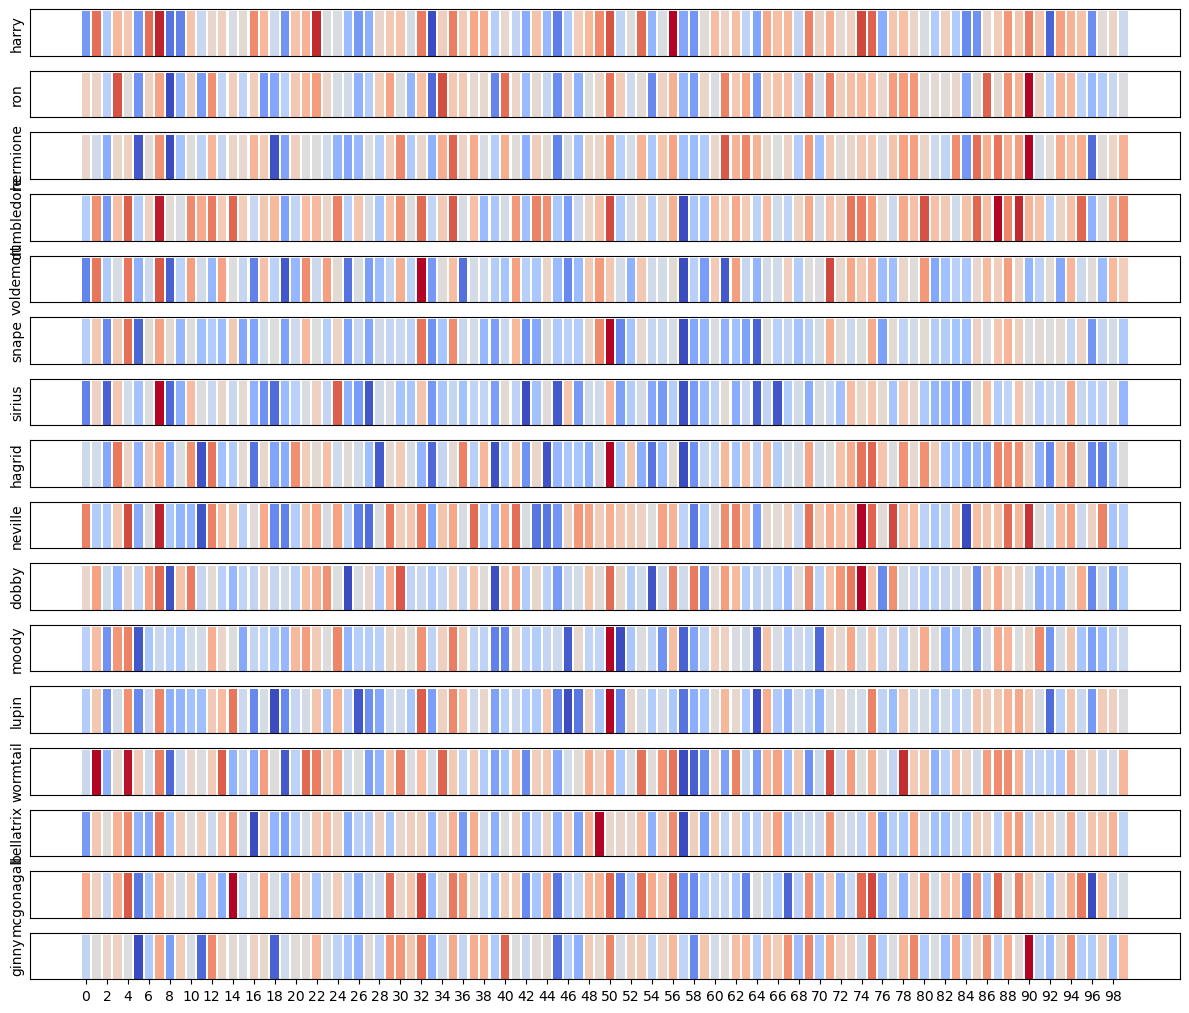

In [127]:
num_elements = len(characters)
fig, axs = plt.subplots(num_elements, 1, figsize=(12, 10))


for i, element in enumerate(characters):

    vector = model.wv.get_vector(element)

    normalized_data = (vector - np.min(vector)) / (np.max(vector) - np.min(vector))


    cmap = plt.get_cmap('coolwarm')

   
    colors = [cmap(val) for val in normalized_data]

 
    axs[i].bar(range(len(vector)), [1] * len(vector), color=colors, align='center')


    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_ylabel(element)


plt.tight_layout()
axs[num_elements-1].set_xticks(range(0,100, 2))

plt.show()


This plot helps to observe similiarity betweeen different characters in the movie. We can assess features of embedding 

Through this color-coded bar plots we can reveal meaningful connections in the word vector space. For example, Band 90 is a representation of Hogwarts students. On the other hand, feature 12 sheds light on the characters' positivity, offering valuable clues about their personalities and emotional traits.

Feel free to explore these fascinating findings further, as they uncover hidden gems within the beloved wizarding universe.

In [128]:
char_vectors = []
for ch in characters:
    char_vectors.append(model.wv.get_vector(ch))

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
features = pca.fit_transform(char_vectors) 

## 3D PCA Representation of Harry Potter Character Vectors

In this analysis, we leverage Principal Component Analysis (PCA) to transform the high-dimensional Word2Vec representations of Harry Potter characters into a more manageable 3D space. PCA allows us to capture the essential character traits while reducing the complexity of the data. The resulting 3D visualization brings these character traits to life, offering a captivating and immersive experience.

As you explore the 3D plot, each data point represents a character, and its position in the 3D space reflects their unique combination of traits. Characters with similar positions are likely to share certain characteristics or have meaningful connections within the wizarding world.

In [152]:
import plotly.express as px
fig = px.scatter_3d(features, x=0,y=1,z=2, color = characters)
fig.show()

1. **Harry's Inner Circle:** Our analysis reveals that Harry is closest to his dear friends Ron and Hermione, signifying their strong bond and shared experiences.

2. **Bonds of Friendship:** Neville's position highlights his closeness not only to Ron, Hermione, Harry, and Ginny but also to other members of Dumbledore's Army, showcasing the strength of his friendships within the Gryffindor circle.

3. **Dark Alliances:** Bellatrix, Snape, and Wormtail are found closest to Voldemort, hinting at their allegiance to the dark wizard.

4. **Dobby's Unique Position:** Dobby, the free elf, stands distinctively away from other characters, emphasizing his unique role in the wizarding world.

5. **Unbreakable Bonds:** Sirius, Lupin, and McGonagall are found close to each other, signifying their strong alliance as part of the good army in the fight against evil.

6. **Voldemort's Opposites:** Voldemort's position is opposite to that of Neville, Ron, Hermione, and Ginny, highlighting their contrasting roles and values in the story.

7. **Lupin's Connection to Sirius:** Lupin's proximity to Sirius indicates their close friendship and shared experiences as part of the Marauders.

8. **Hagrid's Isolation:** Hagrid's position appears farther away, symbolizing his unique status as he cannot perform magic, yet his unwavering loyalty to Dumbledore and the wizarding world.

These intriguing insights from the 3D PCA representation provide valuable glimpses into the character dynamics, alliances, and unique traits within the magical world of Harry Potter.

## Insights from WordCloud

In [137]:
def getParsedList(character, POS):
    tags = []
    for line in lines:
        if character in line.lower().split(" "): 
            pos_tags = nltk.pos_tag(gensim.utils.simple_preprocess(line))
            tags = tags + [word for word, pos_tag in pos_tags if pos_tag.startswith(POS) ]
    return tags

In [138]:
def creatWordcloud(parsed_list, stopwords):
    text = ' '.join(parsed_list)

    wordcloud = WordCloud(stopwords = stopwords, width=800, height=400, max_words= 150).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


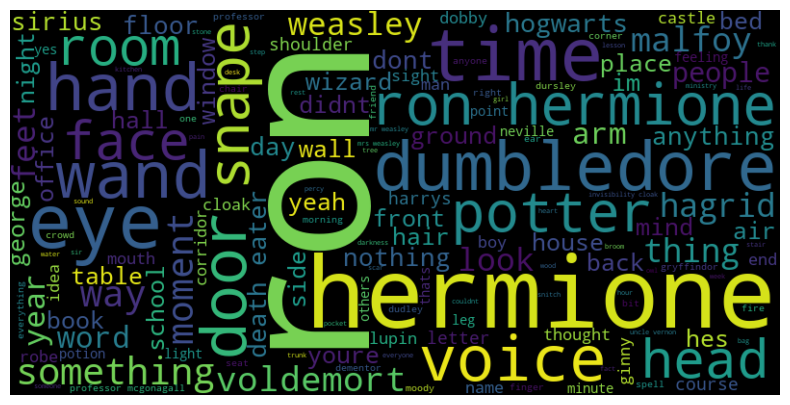

In [139]:
creatWordcloud(getParsedList("harry", "NN"), ["harry"])

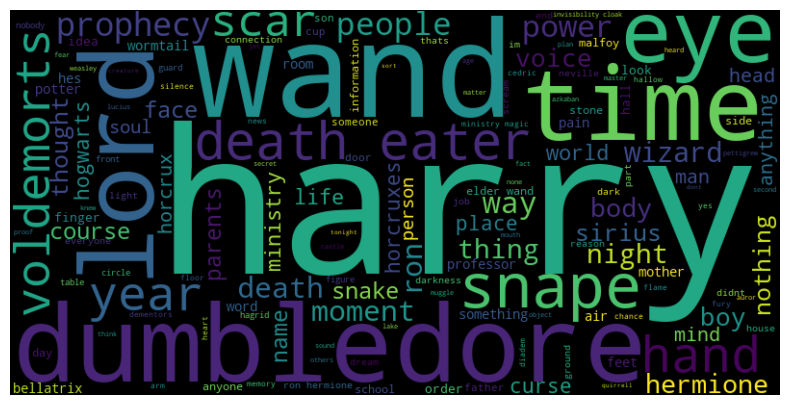

In [140]:
creatWordcloud(getParsedList("voldemort", "NN"), ["voldemort"])

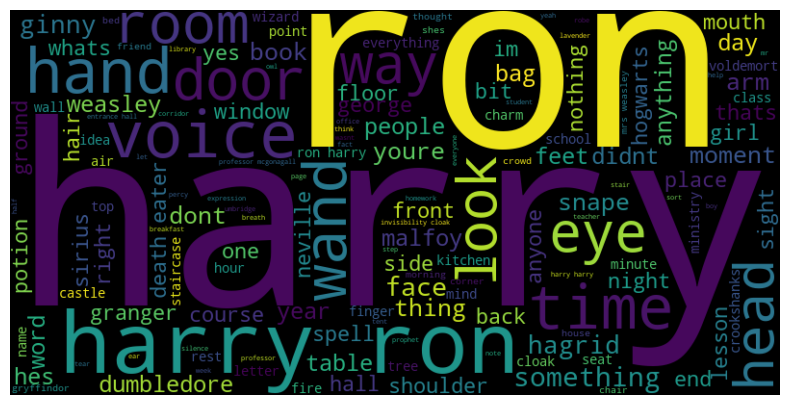

In [141]:
creatWordcloud(getParsedList("hermione","NN"), ["hermione"])

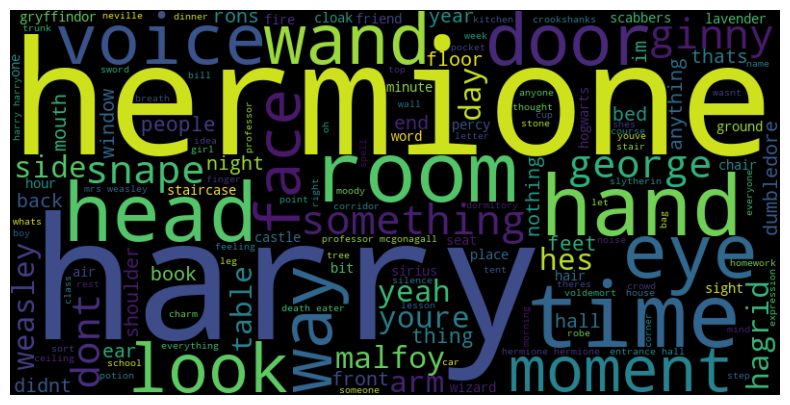

In [142]:
creatWordcloud(getParsedList("ron","NN"), ["ron"])

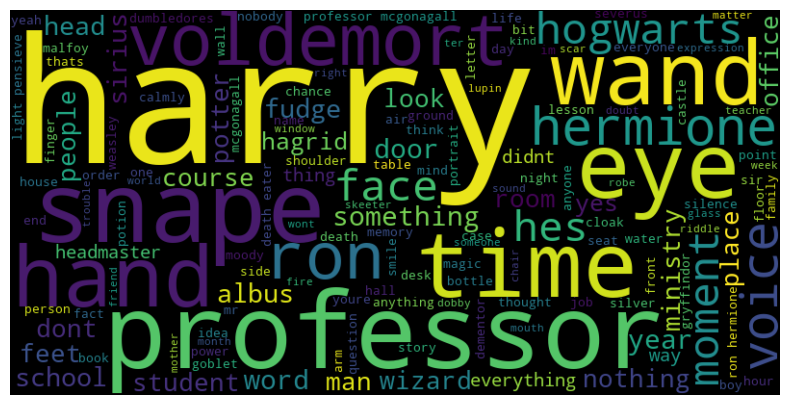

In [146]:
creatWordcloud(getParsedList("dumbledore","NN"), ["dumbledore"])

From the word cloud analysis, we unveil captivating associations and defining elements within the enchanting world of Harry Potter characters:

**Harry's Word Cloud**
Harry's word cloud prominently features "Dumbledore," "Hermione," and "Ron," highlighting his close connections and friendships. Additionally, words like "Voldemort" underscore the significant events and challenges that define his magical journey.

**Voldemort's Word Cloud**
In Voldemort's word cloud, "Harry," "Dumbledore," and "wand" stand out, emphasizing his relentless pursuit of power and the intense rivalry with Harry. Additionally, words like "prophecy" and "Death Eater" reveal his dark ambitions and alliances.

**Hermione's Word Cloud**
Hermione's word cloud showcases "Harry" and "Ron," reflecting her unwavering loyalty to her friends.

**Ron's Word Cloud**
Ron's word cloud highlights "Hermione" and "Harry," showcasing his strong friendship and camaraderie with them. Words like "Dumbledore" and "wand" indicate his pivotal role in the wizarding world's adventures.

**Dumbledore's Word Cloud**
Dumbledore's word cloud reveals "Harry," "Snape," and "Hogwarts," showcasing his influential role as headmaster and protector. Additionally, words like "Voldemort" and "ministry" hint at his involvement in pivotal events.

Through these visually compelling word clouds, we gain captivating insights into the characters' central themes, relationships, and roles within the captivating universe of Harry Potter.

## conclusion

Throughout our enchanting journey into the world of Harry Potter characters, we conducted in-depth analyses using advanced techniques like Word2Vec models and visually appealing tools such as word clouds and 3D PCA representations. With these methods, we explored and revealed the essence of beloved characters, unearthing their distinctive traits, intricate relationships, and meaningful connections.

By unraveling the strong bonds of friendship, the allure of darkness, and the triumph of love and courage, our analysis brought to light the captivating narratives that define the wizarding universe. As we conclude, the magic of Harry Potter continues to inspire and resonate with people of all ages, leaving an everlasting mark on hearts across the globe. 